In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

In [0]:
data_set = datasets.MNIST(
    'data', 
    train=True, 
    download=False, 
    transform= transforms.Compose([
        transforms.ToTensor(),] ))


In [0]:
def load_splitset(dataset,test_split=0.3):
    #test_split = .2
    shuffle_dataset = True
    random_seed= 42
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(test_split * dataset_size))
    if shuffle_dataset :
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    train_indices, test_indices = indices[split:], indices[:split]
    
    testset_size = len(test_indices)
    indices = list(range(testset_size))
    split = int(np.floor(0.5 * testset_size))
    if shuffle_dataset :
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    val_indices, test_indices = indices[split:], indices[:split]


    # Creating  data samplers and loaders:
    train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
    val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)
    test_sampler = torch.utils.data.SubsetRandomSampler(test_indices)

    train_loader = torch.utils.data.DataLoader(dataset, batch_size=36,
                                           sampler=train_sampler)

    test_loader = torch.utils.data.DataLoader(dataset, batch_size=36,
                                                sampler=test_sampler)
    
    val_loader = torch.utils.data.DataLoader(dataset, batch_size=36,
                                                sampler=val_sampler)
    return train_loader,test_loader, val_loader

In [156]:
train_loader,test_loader, val_loader = load_splitset(data_set,test_split=0.3)
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

1167
250
250


In [0]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Linear(784,340),
            nn.ReLU(),
            nn.Linear(340,120),
            nn.ReLU(),
            nn.Linear(120,40),
            nn.ReLU(),
            nn.Linear(40,2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2,40),
            nn.ReLU(),
            nn.Linear(40,120),
            nn.ReLU(),
            nn.Linear(120,340),
            nn.ReLU(),
            nn.Linear(340,784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        #print(x.shape)
        x = self.decoder(x)
        return x

In [0]:
network = Autoencoder()
sample = next(iter(data_set))
image, lables = sample
image = image.view(image.size(0), -1)
pred = network(image)

In [157]:
#training
network = Autoencoder()
torch.manual_seed(42)
criterion = nn.MSELoss() # mean square error loss
optimizer = torch.optim.Adam(network.parameters(),
                                lr=0.001, 
                                weight_decay=1e-5) # <--
# print(train_loader.shape)
use_cuda = True
if use_cuda and torch.cuda.is_available():
    network.cuda()
    print ('cuda')
for epoch in range(20):
    for data in train_loader:
        image, _ = data
        if use_cuda and torch.cuda.is_available():
            image = image.cuda()
        image = image.view(image.size(0), -1)
        recon = network(image)
        loss = criterion(recon, image)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    torch.cuda.empty_cache()
    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))

cuda
Epoch:1, Loss:0.0445
Epoch:2, Loss:0.0456
Epoch:3, Loss:0.0412
Epoch:4, Loss:0.0446
Epoch:5, Loss:0.0422
Epoch:6, Loss:0.0373
Epoch:7, Loss:0.0469
Epoch:8, Loss:0.0378
Epoch:9, Loss:0.0385
Epoch:10, Loss:0.0391
Epoch:11, Loss:0.0352
Epoch:12, Loss:0.0357
Epoch:13, Loss:0.0375
Epoch:14, Loss:0.0408
Epoch:15, Loss:0.0359
Epoch:16, Loss:0.0385
Epoch:17, Loss:0.0373
Epoch:18, Loss:0.0393
Epoch:19, Loss:0.0385
Epoch:20, Loss:0.0333


In [0]:
import pandas as pd
def output_features(data_loader):
    output = []
    for data in data_loader:
        image, lable = data
        if use_cuda and torch.cuda.is_available():
            image = image.cuda()
            lable = lable.cuda()
        for x in range(len(image)):
            img = image[x].view(image[x].size(0), -1)
            recon = network.encoder(img)
            recon = recon.squeeze()
            output.append([recon[0],recon[1],lable[x].item()])
    print(len(output))
    output = np.asarray(output)
    data_points = pd.DataFrame(output)
    data_points.columns=['feat1','feat2','class']
    return data_points

In [178]:
train_dp = output_features(train_loader)

42000


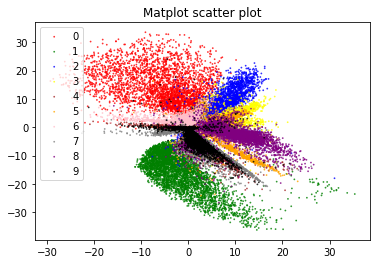

In [179]:
X = []
num_classes = 10
for Class in range(num_classes):
    x = train_dp[ train_dp['class'] == Class]
    X.append(np.array(x)[:,0:2])



plotdata = np.array(X)
colors = ("red", "green", "blue",'yellow','brown','orange','pink','gray','purple','black')
groups = ['0','1','2','3','4','5','6','7','8','9']

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for plotdata, color, group in zip(plotdata, colors, groups):
    
    ax.scatter(plotdata[:,0], plotdata[:,1],s=np.pi, alpha=0.8, c=color, edgecolors='none', label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()



**Using KNN classifier**

In [0]:
# TODO: You have to implement the following class
## Your code goes here...

from sklearn.metrics.pairwise import euclidean_distances
import scipy.stats as ss

class KNearestNeighbor:
    ''' Implements the KNearest Neigbours For Classification... '''
    def __init__(self, k, scalefeatures=False):        
       

        self.K=k
        return
        
        #pass    
        
        
    
    def train(self, X, Y):
        ''' Train K Nearest Neighbour classifier using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        
        
        nexamples,nfeatures=X.shape
        
        # YOUR CODE HERE

        #Your code goes here...
       
        self.X_train=X
        self.Y_train=Y
        
        #define self.X_train to store the training data...
                
    
    def predict(self, X):
        
        """
        Test the trained K-Nearset Neighoubr classifier result on the given examples X
        
                   
            Input:
            ------
            X: [m x d] a matrix of m  d-dimensional test examples.
            Returns:
            -----------
                pclass: the predicted class for the given set of examples, i.e. to which it belongs
        """
        
        num_test = X.shape[0]
        
        y_pred = np.zeros(self.K, dtype = self.Y_train.dtype)
        pclass=[]

        compute_distance = euclidean_distances(X, self.X_train)
        # YOUR CODE HERE

        for x in range(num_test):
            SortedDist=np.sort(compute_distance[x])
            for y in range(self.K):
                index=np.where(SortedDist[y] == compute_distance[x])
                y_pred[y]=self.Y_train[index][0]
                # print(self.Y_train[index][0])
            pclass.append(ss.mode(y_pred)[0][0])
            # print (np.min(compute_distance[x]))

        return pclass
        


**Now Classifying validation data**

In [180]:
val_dp = output_features(val_loader)

9000


In [0]:
KNN = KNearestNeighbor(k=3)
KNN.train(np.asarray(train_dp)[:,0:2],np.asarray(train_dp)[:,-1])
pred = KNN.predict(np.asarray(val_dp)[:,0:2])

In [189]:
#Lets see how good we are doing, by finding the accuracy on the val set..
Total=len(val_dp)
correct=y=0
Ytest = np.asarray(val_dp)[:,-1]
for x in pred:
    if x==Ytest[y]:
        correct+=1
    y+=1
print('Total correct : ',correct, 'Out of : ',len(val_dp))
print('Validation Set Accuracy:',correct/Total)

Total correct :  7152 Out of :  9000
Validation Set Accuracy: 0.7946666666666666


**Now Classifying Test data**

In [191]:
test_dp = output_features(test_loader)

KNN = KNearestNeighbor(k=3)
KNN.train(np.asarray(train_dp)[:,0:2],np.asarray(train_dp)[:,-1])
pred = KNN.predict(np.asarray(test_dp)[:,0:2])

#Lets see how good we are doing, by finding the accuracy on the test set..
Total=len(test_dp)
correct=y=0
Ytest = np.asarray(test_dp)[:,-1]
for x in pred:
    if x==Ytest[y]:
        correct+=1
    y+=1
print('Total correct : ',correct, 'Out of : ',len(val_dp))
print('Test Set Accuracy:',correct/Total)

9000
Total correct :  7118 Out of :  9000
Test Set Accuracy: 0.7908888888888889
